# Model Development 

This file is composed of components of the module development process for preliminary exploration of your data. This code is not a complete module development, but rather a preliminary examination of data. Please see the Table of Contents to explore different areas of MD.
***

##### **Input:** .csv file with entire dataset. Will need to interpolate prior to using unsupervised learning if NaN exist in your dataset
##### **Output:** Figures for EDA
##### **Dependencies:** 
***

##### Format of input: 
.csv file with entire dataset 
***

**Check:** 
* Will need to interpolate data/remove NaN before doing any unsupervised learning for EDA

**Sources:**

***
***

## Table of Contents

#### ML classification
* SVM
* Random Forest
* XGBoost

#### Plot Visualization
* ROC-plot
* LOSO-CV

#### Unsupervised Learning
* [Clustering](#cluster)
    * [KNN Clustering](#knn)
    * [Hierarchical Clustering](#hic)
* [Principal Component Analysis (PCA)](#pca)


***

## Read data:
<a id="read"></a>

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/christinayu/Desktop/AppleWatch.csv') 

NameError: name 'filename' is not defined

## Preliminary Exploratory Data Analysis:

https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb

In [ ]:
len(data)

238595

In [ ]:
data.describe()

,ECG,Apple Watch,Empatica,Garmin,Fitbit,Miband,Biovotion,Skin Tone
count,221475.000000,12791.000000,138252.000000,36625.000000,10861.000000,20632.000000,160841.000000,238595.000000
mean,90.549726,89.579235,88.962121,84.418212,84.253384,86.713794,86.938579,3.638509
std,20.568018,17.021518,15.873166,15.430226,16.898867,14.536440,16.982374,1.669205
min,24.174000,36.000000,48.200000,39.000000,46.000000,45.000000,45.000000,1.000000
25%,76.355000,78.000000,77.630000,73.000000,70.000000,74.000000,75.000000,2.000000
50%,89.291000,89.000000,87.430000,84.000000,81.000000,87.000000,86.000000,4.000000
75%,101.030000,100.000000,99.120000,96.000000,95.000000,98.000000,98.000000,5.000000
max,240.000000,155.000000,178.740000,134.000000,180.000000,128.000000,168.000000,6.000000


### Correlation Plots
<a id="corr" ></a>


In [ ]:
%matplotlib inline

<AxesSubplot:>

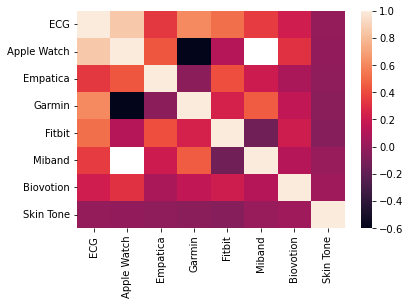

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Unsupervised Learning Section- 

## Clustering
<a id="cluster"></a>

https://www.neuroelectrics.com/blog/clustering-methods-in-exploratory-analysis/

In [ ]:
dfc = data.drop(columns=[]) # drop all non-numeric columns
dfc.head()

### KNN Clustering:
<a id="knn"></a>

In [ ]:
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=3)# fit kmeans object to data
kmeans.fit(dfc)# print location of clusters learned by kmeans object
#print(kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(dfc)

In [ ]:
labels = kmeans.labels_
dfc['clusters'] = labels

### Hierarchical Clustering
<a id="hic"></a>

*Agglomerative (data points are clustered using a bottim-up approach starting with individual data points)


https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Data Dendograms")
dend = shc.dendrogram(shc.linkage(dfc, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dfc)

In [ ]:
print(cluster.labels_)

## PCA (Prinicipal Component Analysis)
<a id="pca"></a>
https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/

https://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html

PCA selects the successive components that explain the maximum variance in the signal.
This is useful to us because we have a large amount of features. 

Install matplotlib widget Ipython magic: https://github.com/matplotlib/jupyter-matplotlib

Problems with matplotlib widget not working: https://github.com/matplotlib/jupyter-matplotlib/issues/66

/Users/christinayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/christinayu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


[0.98318212 0.00850037 0.00831751]
[3.78521638 0.03272613 0.03202212]
[0.98318212 0.00850037]
[3.78521638 0.03272613]


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

/Users/christinayu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


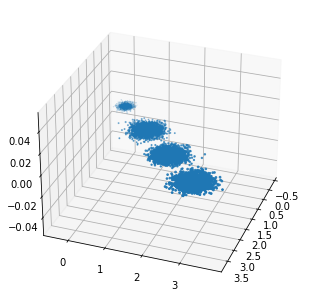

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')


from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)


pca = PCA(n_components=2)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

pca = PCA(n_components=0.95)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

pca = PCA(n_components='mle')
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

## Random Forest
<a id="pca"></a>


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# regression fit
regressor.fit(x,y)

# predict the result
Y_pred = regressor.predict(np.array([6.5]).reshape(1,1))

# Visualization
X_grid = np.arrange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(x,y,color = 'blue')

ply.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Wearable Devices')
plt.ylabel('Medical Stats')
plt.show()

## SVM
<a id="pca"></a>
Support Vector regression is a type of Support vector machine that supports linear and non-linear regression
see tutorial here: https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Fitting the Support Vector Regression Model to the data
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(6.5)

#6 Visualization
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Medical Data for SVM/SVR Model')
plt.xlabel('Wearable Devices')
plt.ylabel('Medical Stats')
plt.show()

## XGBoost
<a id="pca"></a>
The results of the regression problems are continuous or real values. Some commonly used regression algorithms are Linear Regression and Decision Tree

In [ ]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 123)
 
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
 
# Fit the model
xgb_r.fit(train_X, train_y)
 
# Prediction
pred = xgb_r.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))



## ROC and PR Curves
<a id="pca"></a>
Interpret the results of classification using Receiver Operating Characteristics (ROC) and Precision-Recall (PR) Curves in Python

Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”
Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# we use the dataset from previous 
X = data['Time']
y = data['Rate']

#split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred_probaldata = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probaldata)

#plot ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



ModuleNotFoundError: No module named 'plotly'